In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import sys
sys.path.insert(0, '..')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['font.size'] = 16
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

import covid19

In [3]:
data = pd.read_csv('covid-19-it-protezione-civile.csv', parse_dates=['date'])
data['total_cases'] = data['cases'] + data['deaths'] + data['healed']
# official data at reported by regions at 16:00 every day
data['day'] = covid19.data.to_days(data['date'])

data

,date,cases,deaths,healed,critical,severe,total_cases,day
0,2020-02-21 16:00:00,19,1,0,0,0,20,3.0
1,2020-02-22 16:00:00,74,2,0,0,0,76,4.0
2,2020-02-23 16:00:00,149,3,0,0,0,152,5.0
3,2020-02-24 16:00:00,222,7,0,27,101,229,6.0
4,2020-02-25 16:00:00,311,10,1,35,114,322,7.0
5,2020-02-26 16:00:00,385,12,3,36,128,400,8.0
6,2020-02-27 16:00:00,588,17,45,56,248,650,9.0
7,2020-02-28 16:00:00,821,21,46,64,345,888,10.0
8,2020-02-29 16:00:00,1049,29,50,105,401,1128,11.0
9,2020-03-01 16:00:00,1577,34,83,140,639,1694,12.0


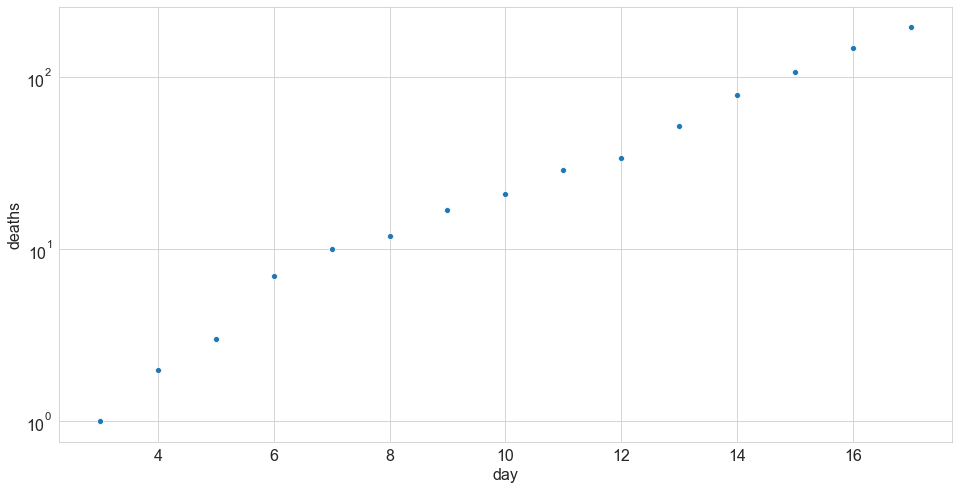

In [4]:
ax = sns.scatterplot('day', 'deaths', data=data)
_ = ax.set(yscale='log')

In [15]:
deaths_fit = covid19.fit.ExponentialFit.from_frame('date', 'deaths', data)
deaths_fit

ExponentialFit(x_0=numpy.datetime64('2020-02-20'), delta_x=numpy.timedelta64(1,'D'), start_fit=1.6666666666666667, stop_fit=15.666666666666666, a=0.9418060363154337, b=1.4187382420493122)

In [17]:
deaths_fit.predict(pd.date_range('2020-01-20', '2020-03-20').values)

array([1.84073358e-05, 2.61151913e-05, 3.70506206e-05, 5.25651323e-05,
       7.45761633e-05, 1.05804055e-04, 1.50108259e-04, 2.12964327e-04,
       3.02140635e-04, 4.28658474e-04, 6.08154169e-04, 8.62811577e-04,
       1.22410378e-03, 1.73668285e-03, 2.46389837e-03, 3.49562684e-03,
       4.95937948e-03, 7.03606132e-03, 9.98232927e-03, 1.41623123e-02,
       2.00926140e-02, 2.85061599e-02, 4.04427792e-02, 5.73777174e-02,
       8.14039620e-02, 1.15490914e-01, 1.63851376e-01, 2.32462213e-01,
       3.29803032e-01, 4.67904174e-01, 6.63833545e-01, 9.41806036e-01,
       1.33617624e+00, 1.89568433e+00, 2.68947985e+00, 3.81566792e+00,
       5.41343400e+00, 7.68024583e+00, 1.08962585e+01, 1.54589386e+01,
       2.19321874e+01, 3.11160329e+01, 4.41455059e+01, 6.26309174e+01,
       8.88568776e+01, 1.26064650e+02, 1.78852740e+02, 2.53745223e+02,
       3.59998051e+02, 5.10743002e+02, 7.24610629e+02, 1.02803281e+03,
       1.45850946e+03, 2.06924315e+03, 2.93571439e+03, 4.16501027e+03,
      